## Case Study: How Does a Bike-Share Navigate Speedy Success?

This study aims to design a new marketing strategy to convert casual riders into annual members.

## About The Company

In 2016, Cyclistic launched a successful bike-share offering. Since then, the program has grown to a fleet of 5,824 bicycles that are geotracked and locked into a network of 692 stations across Chicago. The bikes can be unlocked from one station and returned to any other station in the system anytime. Until now, Cyclistic’s marketing strategy relied on building general awareness and appealing to broad consumer segments. One approach that helped make these things possible was the flexibility of its pricing plans: single-ride passes, full-day passes, and annual memberships. Customers who purchase single-ride or full-day passes are referred to as casual riders. Customers whopurchase annual memberships are Cyclistic members.

## Business Task

#### How do annual members and casual riders use Cyclistic bikes differently?

The findings from this study will assist the business in developing a data-driven marketing strategy grounded in historical trip data, highlighting the distinctions between casual users and annual members. During this phase, I will also engage key stakeholders to gather insights into their previous marketing strategies.

## Tables of Contents

* ride_id: Unique Identification for each trip
* rideable_type: The type or category of vehicle used during the trip
* started_at: Start time of trip
* ended_at: End time of trip
* start_station_name: Name of the station where the rider starts the bike ride
* start_station_id: A unique ID used to identify the station or location where a trip starts
* end_station_name: Name of the station where the rider ends the bike ride
* end_station_id: A unique ID used to identify the station or location where a trip ends
* start_lat: Latitude value of the location where a trip begins
* start_lng: Longitude value of the location where a trip begins
* end_lat: Latitude value of the location where a trip ends
* end_lng: Longitude value of the location where a trip ends
* member_casual: Status used to distinguish whether a user is a member (subscribed member) or casual (regular user)
* ride_length: Traveling time
* start_date: The date the bike trip started
* end_date: The date the bike trip ended
* month_of_year: The month the bike trip started
* day_of_week: The day the bike trip started
* start_hour: The time the bike trip started
* end_hour: The date the bike trip ended

## Contents

1. Total Riders
2. Average Ride Lenghth (MIN)
3. Count of Bike Ride by Hour
4. Rideable Type
5. Average Ride Time per Day
6. Monthly Ride Counts by Member Type
7. Top 10 Most Commonly Used Stations

## Importing Libraries

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns

## Merge Dataset

In [15]:
apr_20 = pd.read_csv(r"C:\Users\ASUS\Documents\KULIAH SEMESTER 6\COURSERA DATA ANLIS\Project\Cyclistic\202004-divvy-tripdata.csv")
mei_20 = pd.read_csv(r"C:\Users\ASUS\Documents\KULIAH SEMESTER 6\COURSERA DATA ANLIS\Project\Cyclistic\202005-divvy-tripdata.csv")
jun_20 = pd.read_csv(r"C:\Users\ASUS\Documents\KULIAH SEMESTER 6\COURSERA DATA ANLIS\Project\Cyclistic\202006-divvy-tripdata.csv")
jul_20 = pd.read_csv(r"C:\Users\ASUS\Documents\KULIAH SEMESTER 6\COURSERA DATA ANLIS\Project\Cyclistic\202007-divvy-tripdata.csv")
aug_20 = pd.read_csv(r"C:\Users\ASUS\Documents\KULIAH SEMESTER 6\COURSERA DATA ANLIS\Project\Cyclistic\202008-divvy-tripdata.csv")
sep_20 = pd.read_csv(r"C:\Users\ASUS\Documents\KULIAH SEMESTER 6\COURSERA DATA ANLIS\Project\Cyclistic\202009-divvy-tripdata.csv")
oct_20 = pd.read_csv(r"C:\Users\ASUS\Documents\KULIAH SEMESTER 6\COURSERA DATA ANLIS\Project\Cyclistic\202010-divvy-tripdata.csv")
nov_20 = pd.read_csv(r"C:\Users\ASUS\Documents\KULIAH SEMESTER 6\COURSERA DATA ANLIS\Project\Cyclistic\202011-divvy-tripdata.csv")
dec_20 = pd.read_csv(r"C:\Users\ASUS\Documents\KULIAH SEMESTER 6\COURSERA DATA ANLIS\Project\Cyclistic\202012-divvy-tripdata.csv")
jan_21 = pd.read_csv(r"C:\Users\ASUS\Documents\KULIAH SEMESTER 6\COURSERA DATA ANLIS\Project\Cyclistic\202101-divvy-tripdata.csv")
feb_21 = pd.read_csv(r"C:\Users\ASUS\Documents\KULIAH SEMESTER 6\COURSERA DATA ANLIS\Project\Cyclistic\202102-divvy-tripdata.csv")
mar_21 = pd.read_csv(r"C:\Users\ASUS\Documents\KULIAH SEMESTER 6\COURSERA DATA ANLIS\Project\Cyclistic\202103-divvy-tripdata.csv")

In [16]:
df = pd.concat([apr_20, mei_20, jun_20, jul_20, aug_20,sep_20,oct_20,nov_20,dec_20,jan_21,feb_21,mar_21],ignore_index = True)

## Data Cleaning

In [18]:
df['started_at'] = pd.to_datetime(df['started_at'])
df['ended_at'] = pd.to_datetime(df['ended_at'])

There is an error in a certain row, where the row has an error in the started_at and ended_at columns. Normally the ended_at column should be greater than the started_at column, but in certain rows there is the opposite. This is confusing because it is impossible for the duration of the trip to have a minus value, therefore I assume that there is an input error in the error so I clean it by swapping the columns in the error row as follows:

In [20]:
df['ride_length'] = (df['ended_at'] - df['started_at']).dt.total_seconds()/60
incorrect_rows = df['ride_length'] < 0
df.loc[incorrect_rows, ['started_at', 'ended_at']] = df.loc[incorrect_rows, ['ended_at', 'started_at']].values
df['ride_length'] = (df['ended_at'] - df['started_at'])

In [21]:
df['start_date'] = df['started_at'].dt.normalize()
df['end_date'] = df['ended_at'].dt.normalize()

There is an error in a certain row where the started at column contains '2020-11-25' and the ended_at column contains '2020-12-15' & the started at column contains '2020-11-26' and the ended_at column contains '2020-12-15'. In the previous cleaning, the row had an error where the started_at column and the ended_at column were swapped, but after cleaning I still suspect that the rows are incorrect, because there are more than 300 rows with similar cases, this can affect the analysis because more than 300 rows have a duration of more than 20 days on the same date. Therefore I wisely deleted those rows.

There are 378 lines deleted

In [24]:
df = df[~((df['start_date'] == '2020-11-25') & (df['end_date'] == '2020-12-15'))]
df = df[~((df['start_date'] == '2020-11-26') & (df['end_date'] == '2020-12-15'))]

In [25]:
df['month_of_year'] = df['started_at'].dt.month_name()

In [26]:
df['day_of_week'] = df['started_at'].dt.day_name()

In [27]:
df['start_hour'] = df['started_at'].dt.hour
df['end_hour'] = df['ended_at'].dt.hour

## Loading Dataset

In [29]:
df.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,ride_length,start_date,end_date,month_of_year,day_of_week,start_hour,end_hour
0,A847FADBBC638E45,docked_bike,2020-04-26 17:45:14,2020-04-26 18:12:03,Eckhart Park,86,Lincoln Ave & Diversey Pkwy,152.0,41.8964,-87.6610,41.9322,-87.6586,member,0 days 00:26:49,2020-04-26,2020-04-26,April,Sunday,17,18
1,5405B80E996FF60D,docked_bike,2020-04-17 17:08:54,2020-04-17 17:17:03,Drake Ave & Fullerton Ave,503,Kosciuszko Park,499.0,41.9244,-87.7154,41.9306,-87.7238,member,0 days 00:08:09,2020-04-17,2020-04-17,April,Friday,17,17
2,5DD24A79A4E006F4,docked_bike,2020-04-01 17:54:13,2020-04-01 18:08:36,McClurg Ct & Erie St,142,Indiana Ave & Roosevelt Rd,255.0,41.8945,-87.6179,41.8679,-87.6230,member,0 days 00:14:23,2020-04-01,2020-04-01,April,Wednesday,17,18
3,2A59BBDF5CDBA725,docked_bike,2020-04-07 12:50:19,2020-04-07 13:02:31,California Ave & Division St,216,Wood St & Augusta Blvd,657.0,41.9030,-87.6975,41.8992,-87.6722,member,0 days 00:12:12,2020-04-07,2020-04-07,April,Tuesday,12,13
4,27AD306C119C6158,docked_bike,2020-04-18 10:22:59,2020-04-18 11:15:54,Rush St & Hubbard St,125,Sheridan Rd & Lawrence Ave,323.0,41.8902,-87.6262,41.9695,-87.6547,casual,0 days 00:52:55,2020-04-18,2020-04-18,April,Saturday,10,11


## Exploratory Data Analysis

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3489370 entries, 0 to 3489747
Data columns (total 20 columns):
 #   Column              Dtype          
---  ------              -----          
 0   ride_id             object         
 1   rideable_type       object         
 2   started_at          datetime64[ns] 
 3   ended_at            datetime64[ns] 
 4   start_station_name  object         
 5   start_station_id    object         
 6   end_station_name    object         
 7   end_station_id      object         
 8   start_lat           float64        
 9   start_lng           float64        
 10  end_lat             float64        
 11  end_lng             float64        
 12  member_casual       object         
 13  ride_length         timedelta64[ns]
 14  start_date          datetime64[ns] 
 15  end_date            datetime64[ns] 
 16  month_of_year       object         
 17  day_of_week         object         
 18  start_hour          int32          
 19  end_hour            int32 

In [32]:
df.shape

(3489370, 20)

In [33]:
df.columns

Index(['ride_id', 'rideable_type', 'started_at', 'ended_at',
       'start_station_name', 'start_station_id', 'end_station_name',
       'end_station_id', 'start_lat', 'start_lng', 'end_lat', 'end_lng',
       'member_casual', 'ride_length', 'start_date', 'end_date',
       'month_of_year', 'day_of_week', 'start_hour', 'end_hour'],
      dtype='object')

In [34]:
df.isnull().sum()

ride_id                    0
rideable_type              0
started_at                 0
ended_at                   0
start_station_name    122134
start_station_id      122760
end_station_name      143191
end_station_id        143652
start_lat                  0
start_lng                  0
end_lat                 4737
end_lng                 4737
member_casual              0
ride_length                0
start_date                 0
end_date                   0
month_of_year              0
day_of_week                0
start_hour                 0
end_hour                   0
dtype: int64

In [35]:
df.describe()

,started_at,ended_at,start_lat,start_lng,end_lat,end_lng,ride_length,start_date,end_date,start_hour,end_hour
count,3489370,3489370,3.489370e+06,3.489370e+06,3.484633e+06,3.484633e+06,3489370,3489370,3489370,3.489370e+06,3.489370e+06
mean,2020-09-10 01:06:43.118121216,2020-09-10 01:34:35.474299392,4.190417e+01,-8.764494e+01,4.190444e+01,-8.764522e+01,0 days 00:27:52.356179195,2020-09-09 10:18:05.910636032,2020-09-09 10:33:12.482080768,1.431061e+01,1.451939e+01
min,2020-04-01 00:00:30,2020-04-01 00:10:45,4.164000e+01,-8.787000e+01,4.154000e+01,-8.807000e+01,0 days 00:00:00,2020-04-01 00:00:00,2020-04-01 00:00:00,0.000000e+00,0.000000e+00
25%,2020-07-14 19:34:57.500000,2020-07-14 20:09:39.500000,4.188224e+01,-8.765888e+01,4.188266e+01,-8.765917e+01,0 days 00:07:53,2020-07-14 00:00:00,2020-07-14 00:00:00,1.100000e+01,1.200000e+01
50%,2020-08-29 14:45:05,2020-08-29 15:16:48.500000,4.190000e+01,-8.764170e+01,4.190068e+01,-8.764275e+01,0 days 00:14:31,2020-08-29 00:00:00,2020-08-29 00:00:00,1.500000e+01,1.500000e+01
75%,2020-10-20 18:00:33,2020-10-20 18:16:02.249999872,4.193000e+01,-8.762773e+01,4.193120e+01,-8.762775e+01,0 days 00:26:38,2020-10-20 00:00:00,2020-10-20 00:00:00,1.800000e+01,1.800000e+01
max,2021-03-31 23:59:08,2021-04-06 11:00:11,4.208000e+01,-8.752000e+01,4.216000e+01,-8.744000e+01,40 days 18:40:02,2021-03-31 00:00:00,2021-04-06 00:00:00,2.300000e+01,2.300000e+01
std,NaN,NaN,4.364179e-02,2.575945e-02,4.373673e-02,2.589095e-02,0 days 04:12:29.619378470,NaN,NaN,4.599684e+00,4.720039e+00


## Data Visualization

### Total Riders

In [38]:
total_riders = df['ride_id'].nunique()
print(total_riders)

3489370


In [39]:
total_rider_casual_member = df.groupby('member_casual')['ride_id'].count()
percent_rider_casual_member = (total_rider_casual_member/total_riders)*100
print(percent_rider_casual_member)

member_casual
casual    40.990121
member    59.009879
Name: ride_id, dtype: float64


### Average Ride Lenghth (MIN)

In [41]:
ride_length = df.groupby('member_casual')['ride_length'].mean().dt.total_seconds()/60
labels = [f"{cat}\n{mean:.2f} minutes" for cat, mean in zip(ride_length.index, ride_length)]
print(ride_length)

member_casual
casual    44.871594
member    16.064568
Name: ride_length, dtype: float64


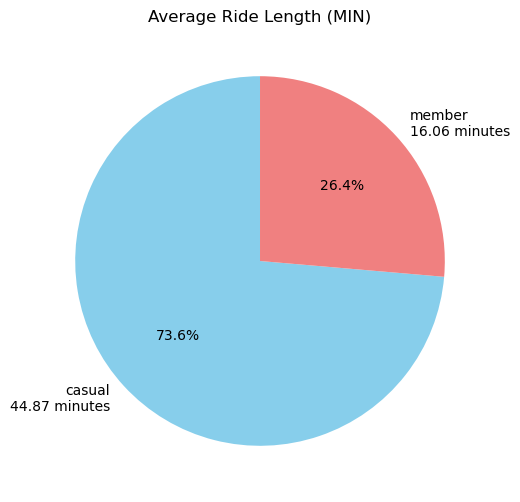

In [92]:
plt.figure(figsize=(6, 6))
ride_length.plot.pie(
    autopct='%1.1f%%',
    startangle=90,
    labels=labels,
    colors=['skyblue', 'lightcoral']
)

plt.title("Average Ride Length (MIN)")
plt.ylabel('')
plt.show()

### Count of Bike Ride by Hour

In [44]:
hourly_counts = df.groupby(['member_casual', 'start_hour']).size().unstack(fill_value=0)
print(hourly_counts)

start_hour        0      1     2     3     4      5      6      7       8   \
member_casual                                                                
casual         22485  14040  7704  4129  3444   5415  12913  23201   31837   
member         12138   6823  3668  2336  3588  17339  56480  94882  103113   

start_hour        9   ...      14      15      16      17      18      19  \
member_casual         ...                                                   
casual         40847  ...  113729  119864  126821  140376  126485   96582   
member         87350  ...  136423  151279  180690  216427  187862  130814   

start_hour        20     21     22     23  
member_casual                              
casual         67844  48938  43810  35229  
member         80335  48096  33877  23094  

[2 rows x 24 columns]


<Figure size 1000x600 with 0 Axes>

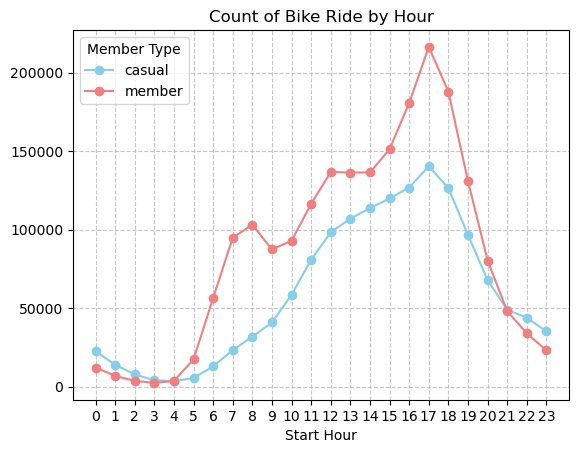

In [45]:
plt.figure(figsize=(10, 6))
hourly_counts.T.plot(kind='line', marker='o',color=['skyblue', 'lightcoral'])

plt.title('Count of Bike Ride by Hour')
plt.xlabel('Start Hour')
plt.xticks(range(24))
plt.legend(title='Member Type', loc='upper left')
plt.grid(linestyle='--', alpha=0.7)
plt.show()

### Rideable Type

In [47]:
bike_type = df.groupby(['member_casual', 'rideable_type']).size().unstack(fill_value=0)
print(bike_type)

rideable_type  classic_bike  docked_bike  electric_bike
member_casual                                          
casual                70801      1116558         242938
member               249072      1441702         368299


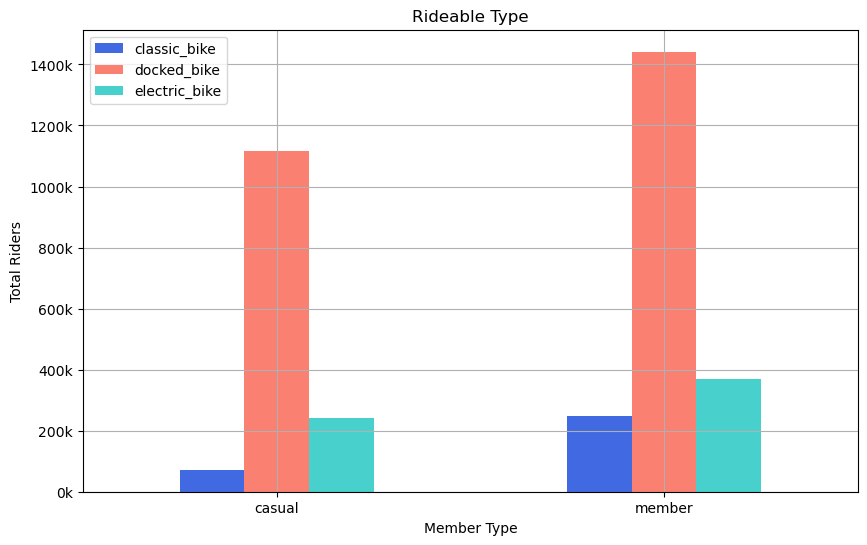

In [48]:
bike_type_in_k = bike_type / 1000
ax = bike_type_in_k.plot(kind='bar', color = ['#4169E1','#FA8072','#48D1CC'], figsize=(10, 6))
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f'{int(x)}k'))

plt.title('Rideable Type')
plt.xlabel('Member Type')
plt.ylabel('Total Riders')
plt.xticks(rotation=0)
plt.legend(loc = 'upper left')
plt.grid(True)
plt.show()

### Average Ride Time per Day

In [50]:
ride_time_day = df.groupby(['day_of_week','member_casual'])['ride_length'].mean().dt.total_seconds()/60
print(ride_time_day)
ride_time_day = ride_time_day.reset_index()

day_of_week  member_casual
Friday       casual           42.652415
             member           15.753778
Monday       casual           44.891318
             member           15.294814
Saturday     casual           46.839008
             member           17.731431
Sunday       casual           50.632638
             member           18.155042
Thursday     casual           42.899724
             member           15.166571
Tuesday      casual           40.402310
             member           15.083732
Wednesday    casual           40.241209
             member           15.265198
Name: ride_length, dtype: float64


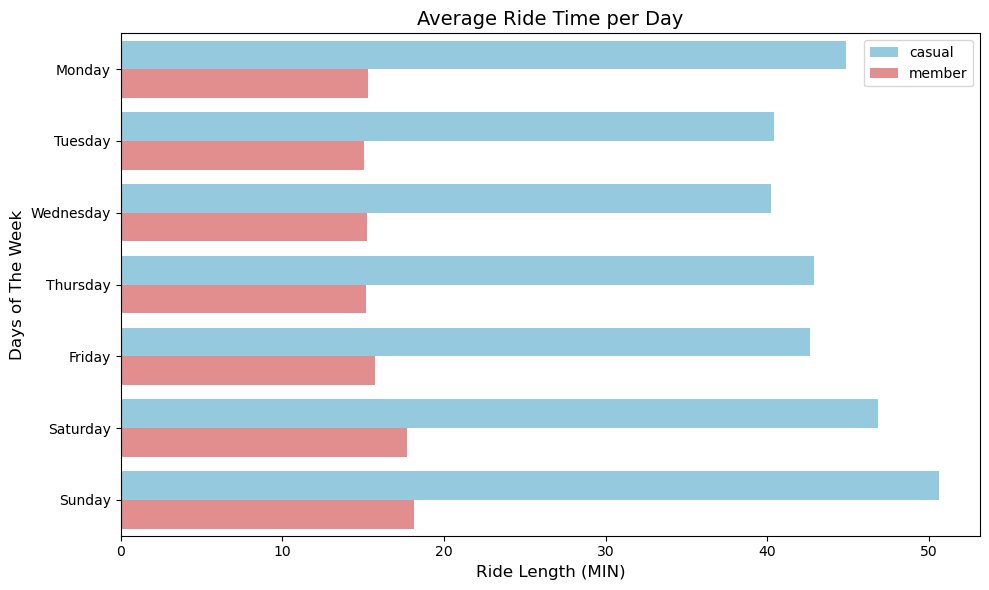

In [51]:
plt.figure(figsize=(10, 6))
sns.barplot(
    data=ride_time_day,
    x='ride_length',
    y=pd.Categorical(ride_time_day['day_of_week'], categories=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], ordered=True),
    hue='member_casual',
    palette=['skyblue', 'lightcoral'] 
)

plt.title('Average Ride Time per Day', fontsize=14)
plt.xlabel('Ride Length (MIN)', fontsize=12)
plt.ylabel('Days of The Week', fontsize=12)
plt.legend(loc='upper right')
plt.tight_layout()

plt.show()

### Monthly Ride Counts by Member Type

In [53]:
monthly_counts = df.groupby(['member_casual', 'month_of_year']).size().unstack(fill_value=0)
all_months = [
    'January', 'February', 'March', 'April', 'May', 'June',
    'July', 'August', 'September', 'October', 'November', 'December'
]
monthly_counts = monthly_counts[all_months] 
print(monthly_counts)

month_of_year  January  February   March  April     May    June    July  \
member_casual                                                             
casual           18117     10131   84033  23628   86909  154718  269296   
member           78717     39491  144463  61148  113365  188287  282184   

month_of_year  August  September  October  November  December  
member_casual                                                  
casual         289661     230692   145012     88099     30001  
member         332700     302266   243641    171617    101194  


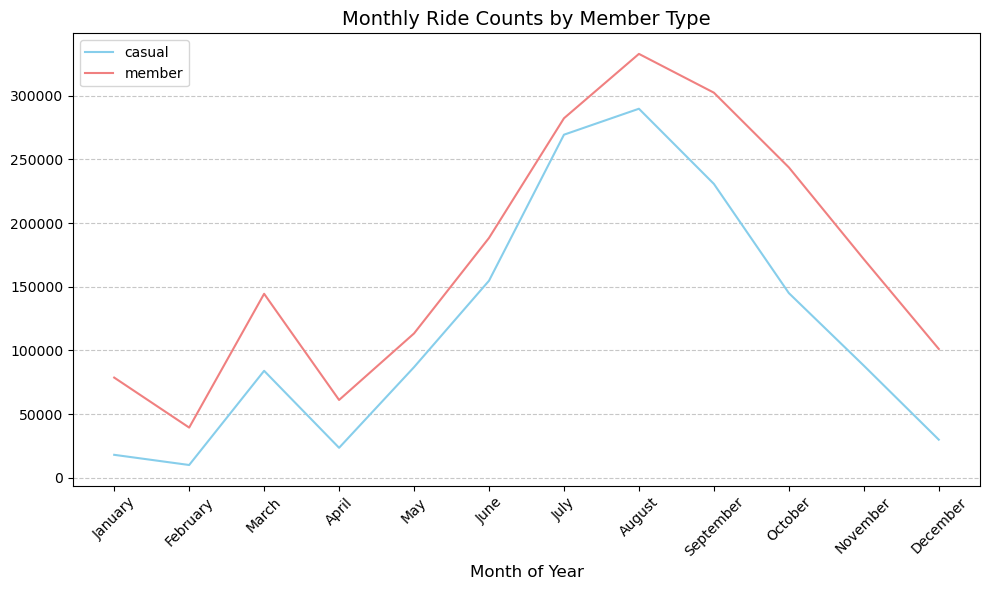

In [54]:
plt.figure(figsize=(10, 6))
colors = ['skyblue', 'lightcoral']
for i, member_type in enumerate(monthly_counts.index):
    plt.plot(
        monthly_counts.columns,
        monthly_counts.loc[member_type],
        label=member_type,
        color=colors[i]
    )
plt.title('Monthly Ride Counts by Member Type', fontsize=14)
plt.xlabel('Month of Year', fontsize=12)
plt.legend(loc = 'upper left')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


### Top 10 Most Commonly Used Stations

In [56]:
station_counts = df.groupby('start_station_name').size().reset_index(name='count')
top_10_station = station_counts.sort_values('count',ascending=False).head(10)
print(top_10_station.to_string(index=False))

        start_station_name  count
   Streeter Dr & Grand Ave  35362
         Clark St & Elm St  32470
 Lake Shore Dr & Monroe St  29918
       Theater on the Lake  29887
Lake Shore Dr & North Blvd  27126
     Wells St & Concord Ln  25215
Indiana Ave & Roosevelt Rd  24482
           Millennium Park  24428
      Broadway & Barry Ave  24145
     Dearborn St & Erie St  24101


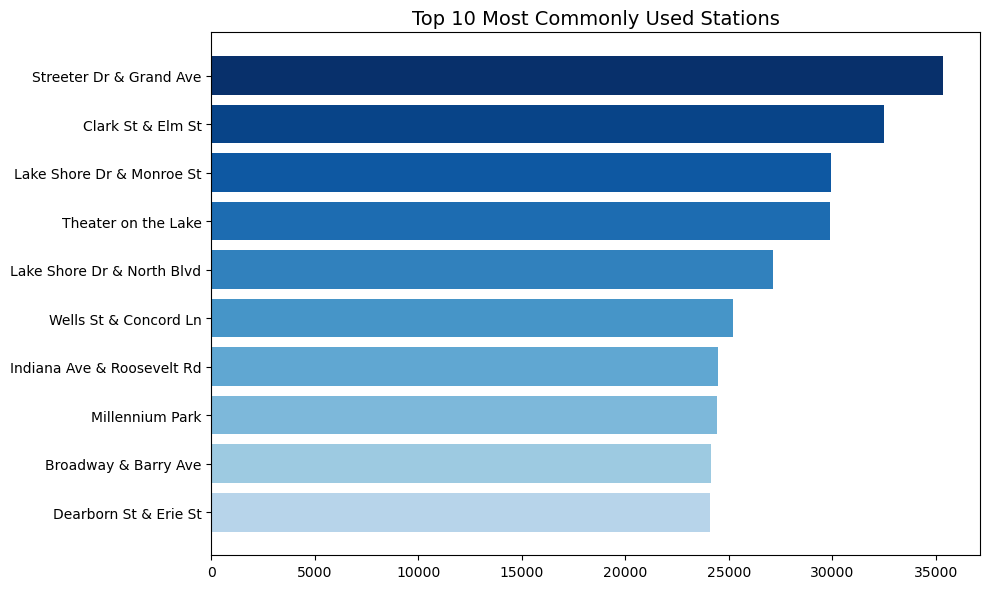

In [57]:
colors = plt.cm.Blues(np.linspace(1, 0.3, len(top_10_station)))
plt.figure(figsize=(10, 6))
plt.barh(top_10_station['start_station_name'], top_10_station['count'], color= colors)
plt.title('Top 10 Most Commonly Used Stations',fontsize = 14)
plt.gca().invert_yaxis()  # Membalik sumbu y agar stasiun dengan count tertinggi di atas
plt.tight_layout()
plt.show()

## Result

Based on my analysis, I have several conclusions.
Casual riders spend an average of 44 minutes riding their bikes, which is surprising because the number of casual riders is less than annual members but has an average time riding a bike that is greater than annual members, where annual members only spend an average of about 16 minutes.
Based on daily rider trends, annual members use their bikes more to work because the volume of annual member riders is highest at 6:00 to 8:00 and 15:00 to 18:00, while the volume of casual riders is highest in the afternoon to evening around 13:00 to 18:00. Both annual members and casual riders ride their bikes more during the weekend than on weekdays, but there is a significant difference in the duration of casual riders which is longer than annual members.
The type of bike most used by both annual members and casual riders is a parked bike, the rest use electric bikes and only a few use classic bikes.
In early spring, the volume of cyclists, both annual members and casual riders, began to increase precisely in February, but dropped again in mid-March because at that time the government announced that it would implement a lockdown to reduce the spread of Covid-19. After the rules were relaxed, the volume of cyclists began to increase again, peaking during the summer holidays.

To answer the question in the case study: How does a bike-share navigate speedy success?, I have 3 recommendations to increase the number of annual members and convert casual riders into annual members.
1. Create promotions and bonuses for annual member riders who travel long distances or long times, so that they attract a lot of attention for casual riders to start annual subscriptions.
2. Spread annual membership promotion advertisements at stations that are crowded with cyclists, and offer a trial program to casual riders.
3. Create discount offers for cyclists who want to subscribe during the summer holidays, because there is a spike in rider volume during the summer holidays.

There are several other factors to help successful marketing such as the use of social media, educating the public about the benefits of cycling, and efforts to make the city free from vehicle exhaust pollution.